In [2]:
from data import get_default_transform, Image2FeedDataset
import torch
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image 
from mpl_toolkits.axes_grid1 import ImageGrid
import cv2
import numpy as np

from model import Pytorch_model
import pandas as pd
import os

ValueError: numpy.ndarray size changed, may indicate binary incompatibility. Expected 88 from C header, got 80 from PyObject

In [179]:

dataset_dir = '/home/divclab/Desktop/Enip/data/feeds'

transform_train, transform_test = get_default_transform(norm=False)
train_dataset = Image2FeedDataset(root_dir=dataset_dir, train=True, transform=transform_train)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=24, shuffle=True, num_workers=8)

val_dataset = Image2FeedDataset(root_dir=dataset_dir, train=False, transform=transform_test)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=24, shuffle=True, num_workers=8)


20977
4672


In [ ]:
transform_test = transforms.Compose([
        transforms.Resize([256, 256]),
        transforms.ToTensor(),])

test_folder = os.path.join(dataset_dir, 'test-data')
test_dataset = ImageFolder(test_folder, transform=transform_test)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=24, shuffle=True, num_workers=8)
print(test_dataset)


In [ ]:
for img, label in test_loader:
    print(label)


In [ ]:
for data, label in test_loader:

    imgs = []
    label_names = []
    preds = []
    preds_index = []
    for i in range(len(data)):

        d = data[i]

        np_data =  np.transpose(d.numpy(), (1, 2,0))
        result = model.predict(np_data, is_numpy=True)
        pred, max_prob = 0,0
        for l, p in result:
            if p > max_prob:
                max_prob = p
                pred = l
        preds.append(pred)

        img = transforms.ToPILImage()(d)
        imgs.append(img)

        label_idx = label[i]

        label_names.append(train_dataset.label_names[label_idx])

    accuracy = (np.array(preds) == np.array(label_names)).sum() / len(label_names)
    print(accuracy)
    if label_names == preds:
        continue
    fig = plt.figure(figsize=(18., 12.))
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 6),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )


    for i ,ax in enumerate(grid):

        ax.imshow(imgs[i])

        correct_color = 'green' if preds[i] == label_names[i] else 'red'
        predict = ax.text(120, 20, preds[i],fontsize=14, backgroundcolor='white',ha='center', va='center', color=correct_color)
        predict.set_bbox(dict(facecolor='white', alpha=0.7, edgecolor=correct_color))
        ground_truth = ax.text(120, 55, label_names[i],fontsize=14, backgroundcolor='white',ha='center', va='center')
        ground_truth.set_bbox(dict(facecolor='white', alpha=0.7, edgecolor='green'))

    break

In [180]:
train_dataset.label_names

['Salad',
 'Apple',
 'Pen',
 'Phone',
 'Cola',
 'Ring',
 'Cash',
 'Small-general-Feed',
 'Medium-general-Feed',
 'Large-general-Feed']

In [181]:

model_path = 'feed.pt'
gpu_id = 0
model = Pytorch_model(model_path=model_path, img_shape=[
    224, 224], img_channel=3, gpu_id=gpu_id, classes_txt='labels_feeds')

{'0': 'Salad', '1': 'Apple', '2': 'Pen', '3': 'Phone', '4': 'Cola', '5': 'Ring', '6': 'Cash', '7': 'Small-general-Feed', '8': 'Medium-general-Feed', '9': 'Large-general-Feed'}


In [182]:
train_path = os.path.join(dataset_dir, 'train')
label_transaction_path = os.path.join(dataset_dir, 'folder_label')

print(os.listdir(dataset_dir))

label_transaction = pd.read_csv(label_transaction_path)
label_transaction

['val', 'folder_label', 'train', 'origin_class']


,folder,label
0,n12057211,Salad
1,n11939491,Salad
2,n11879895,Salad
3,n07875152,Apple
4,n07873807,Apple
5,n07753275,Apple
6,n04116512,Pen
7,n03876231,Pen
8,n04004767,Phone
9,n03857828,Phone


In [183]:
origin_label = pd.read_csv(os.path.join(dataset_dir, 'origin_class'))
origin_label = origin_label.set_index('folder')['label'].to_dict()
origin_label

{'n12057211': 'Cypripedium parviflorum',
 'n11939491': 'daisy',
 'n11879895': 'rapeseed',
 'n07875152': 'potpie',
 'n07873807': 'pizza',
 'n07753275': 'pineapple',
 'n04116512': 'pencil & eraser',
 'n03876231': 'paintbrush',
 'n04004767': 'printer',
 'n03857828': 'oscilloscope',
 'n02992529': 'cellphone',
 'n03983396': 'soda bottle',
 'n03764736': 'milk can',
 'n02977058': 'cash dispenser',
 'n02802426': 'basketball',
 'n03777568': 'model T car',
 'n04037443': 'racing car',
 'n09468604': 'valley',
 'n03899768': 'terrace house',
 'n03895866': 'train'}

In [184]:
label_transaction_dict = label_transaction.set_index('folder')['label'].to_dict()
label_transaction_dict

{'n12057211': 'Salad',
 'n11939491': 'Salad',
 'n11879895': 'Salad',
 'n07875152': 'Apple',
 'n07873807': 'Apple',
 'n07753275': 'Apple',
 'n04116512': 'Pen',
 'n03876231': 'Pen',
 'n04004767': 'Phone',
 'n03857828': 'Phone',
 'n02992529': 'Phone',
 'n03983396': 'Cola',
 'n03764736': 'Ring',
 'n02977058': 'Cash',
 'n02802426': 'Small-general-Feed',
 'n03777568': 'Medium-general-Feed',
 'n04037443': 'Medium-general-Feed',
 'n09468604': 'Large-general-Feed',
 'n03899768': 'Large-general-Feed',
 'n03895866': 'Large-general-Feed'}

In [185]:
all_folder = os.listdir(train_path)

img_per_folder = []
for f in all_folder:
    folder_path = os.path.join(train_path, f)
    
    files = os.listdir(folder_path)
    file_path = os.path.join(folder_path, files[0])
    img_per_folder.append(file_path)
    
img_per_folder


['/home/divclab/Desktop/Enip/data/feeds/train/n03895866/n03895866_100083.JPEG',
 '/home/divclab/Desktop/Enip/data/feeds/train/n09468604/n09468604_16672.JPEG',
 '/home/divclab/Desktop/Enip/data/feeds/train/n07873807/n07873807_11598.JPEG',
 '/home/divclab/Desktop/Enip/data/feeds/train/n02977058/n02977058_5047.JPEG',
 '/home/divclab/Desktop/Enip/data/feeds/train/n04037443/n04037443_44285.JPEG',
 '/home/divclab/Desktop/Enip/data/feeds/train/n11939491/n11939491_922.JPEG',
 '/home/divclab/Desktop/Enip/data/feeds/train/n07875152/n07875152_1939.JPEG',
 '/home/divclab/Desktop/Enip/data/feeds/train/n02802426/n02802426_10027.JPEG',
 '/home/divclab/Desktop/Enip/data/feeds/train/n04116512/n04116512_36672.JPEG',
 '/home/divclab/Desktop/Enip/data/feeds/train/n03857828/n03857828_41414.JPEG',
 '/home/divclab/Desktop/Enip/data/feeds/train/n03764736/n03764736_393.JPEG',
 '/home/divclab/Desktop/Enip/data/feeds/train/n03899768/n03899768_56713.JPEG',
 '/home/divclab/Desktop/Enip/data/feeds/train/n02992529/n

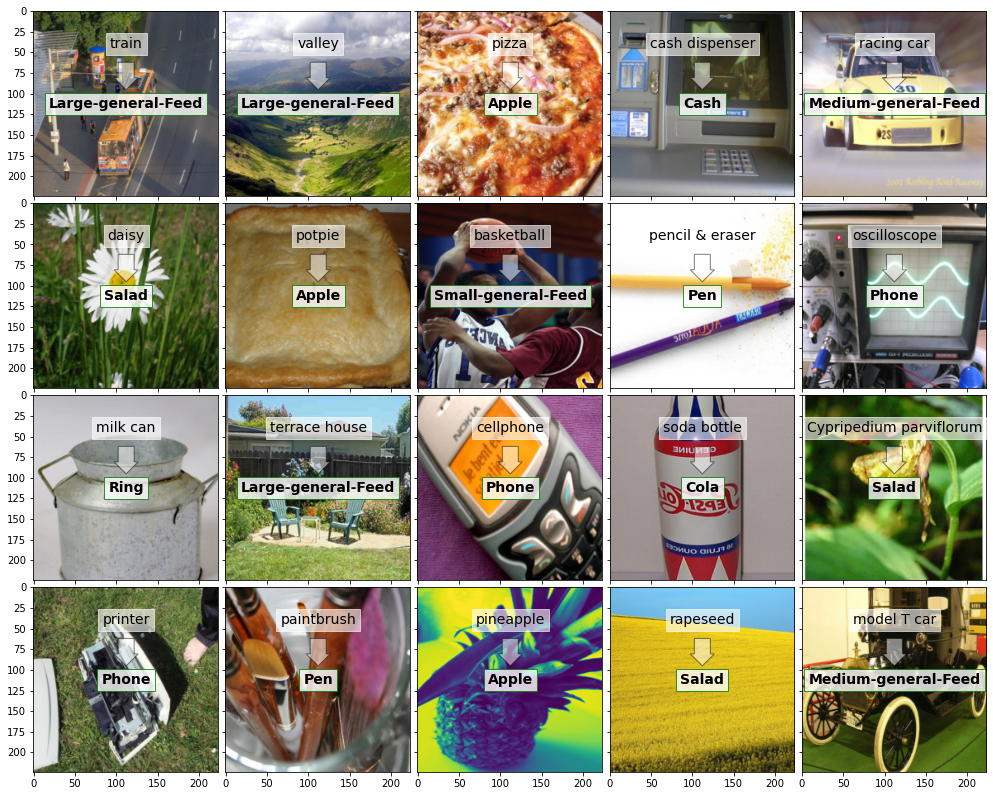

In [186]:
all_imgs = []
for i in img_per_folder:
    img = Image.open(i) 
    
    t = transform_train(img)
    img = transforms.ToPILImage()(t)

    all_imgs.append(img)
    
fig = plt.figure(figsize=(18., 14.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
             nrows_ncols=(4, 5),  # creates 2x2 grid of axes
             axes_pad=0.1,  # pad between axes in inch.
             )


for i ,ax in enumerate(grid):

    ax.imshow(all_imgs[i])

    ground_truth = ax.text(112, 40, origin_label[all_folder[i]],fontsize=14, backgroundcolor='white',ha='center', va='center')
    ground_truth.set_bbox(dict(facecolor='white', alpha=0.6, edgecolor='white'))
    
    bbox_props = dict(boxstyle="rarrow,pad=0.3", fc="white", ec="black", lw=1,  alpha=0.5)
    t = ax.text(112, 75, "     ", ha="center", va="center", rotation=270,size=10,bbox=bbox_props)

    ground_truth = ax.text(112, 112, label_transaction_dict[all_folder[i]],fontsize=14, backgroundcolor='white',ha='center', va='center', weight='bold')
    ground_truth.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='green', lw=1))


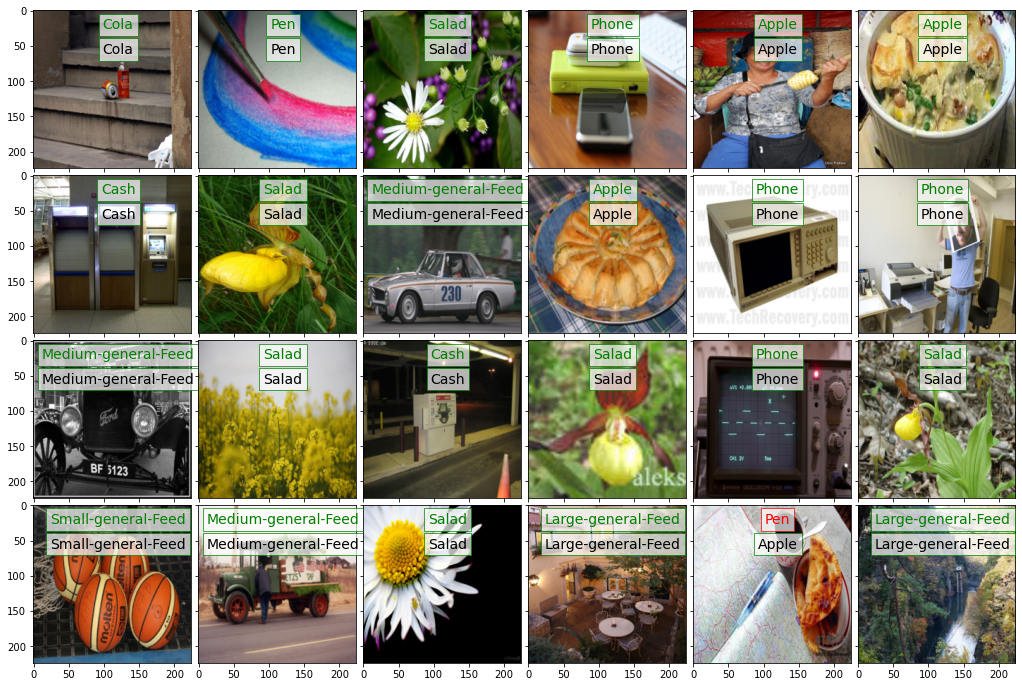

In [187]:
for data, label in val_loader:
    
    imgs = []
    label_names = []
    preds = []
    for i in range(len(data)):
        
        d = data[i]
        
        np_data =  np.transpose(d.numpy(), (1, 2,0)) 
        result = model.predict(np_data, is_numpy=True)
        pred, max_prob = 0,0
        for l, p in result:
            if p > max_prob:
                max_prob = p
                pred = l
        preds.append(pred)
        
        img = transforms.ToPILImage()(d)
        imgs.append(img)
        
        label_idx = np.where(label[i] == 1)[0][0]
        label_names.append(train_dataset.label_names[label_idx])
        
    if label_names == preds:
        continue
    fig = plt.figure(figsize=(18., 12.))
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 6),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )
    

    for i ,ax in enumerate(grid):

        ax.imshow(imgs[i])
        
        correct_color = 'green' if preds[i] == label_names[i] else 'red'
        predict = ax.text(120, 20, preds[i],fontsize=14, backgroundcolor='white',ha='center', va='center', color=correct_color)
        predict.set_bbox(dict(facecolor='white', alpha=0.7, edgecolor=correct_color))
        ground_truth = ax.text(120, 55, label_names[i],fontsize=14, backgroundcolor='white',ha='center', va='center')
        ground_truth.set_bbox(dict(facecolor='white', alpha=0.7, edgecolor='green'))

    break